# 🐶End-to-end multi-class dog breed classification

This notebook builds an end-to-end multi-class image classifier using TensorFlow 2.0 and TensorFlow hub.

link-to-the-FAQs-about-google-colab - [Google Colab FAQs](https://research.google.com/colaboratory/faq.html)

## 1. Problem

Identifying the breed of a dog given an image of a dog.

## 2. Data

The data using is from Kaggle's dog breed identification competion.

link-to-the-data-set - [Dog Breed Dataset](https://www.kaggle.com/competitions/dog-breed-identification)

## 3. Evaluation

Submissions are evaluated on Multi Class Log Loss between the predicted probability and the observed target.

The evaluation is a file with prediction probabilities for each dog breed of each test image.

link-to-the-overview - [Evaluation overview](https://www.kaggle.com/competitions/dog-breed-identification/overview)

## 4. Feature

Some information about the data

* These are unstructured data (unstructured data) so its probably best we use deep learning/transfer learning.
* There are 120 breeds of dogs (this means there are 120 different classes)
* There are 10,000+ images inthe training set and 10,000+ images in the test set

In [99]:
# unzipping the dataset
# !unzip 'drive/MyDrive/Dog Vision/dog-breed-identification.zip' -d 'drive/MyDrive/Dog Vision/'

### Get the workspace ready

* Import TensorFlow 2.x ✅
* Import TensorFlow Hub ✅
* Make sure we're using the GPU ✅

In [100]:
# Import necessary tools
import tensorflow as tf
import tensorflow_hub as hub
print('TensorFlow version : ', tf.__version__)
print("Tensorflow Hub version : ", hub.__version__)

# Check for GPU availability
print("GPU", "available" if tf.config.list_physical_devices("GPU") else "not available")

TensorFlow version :  2.15.0
Tensorflow Hub version :  0.15.0
GPU available


## Getting data ready

With all machine learning models, our data has to be in numerical format. So that's what we will be doing first. Turning our images into Tensors (Numerical representations).

Let's start by accessing our data and checking out the labels.

In [101]:
# Checking the labels of the data
import pandas as pd

labels_csv = pd.read_csv("drive/MyDrive/Dog Vision/labels.csv")
print(labels_csv.describe())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126


In [102]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

<Axes: >

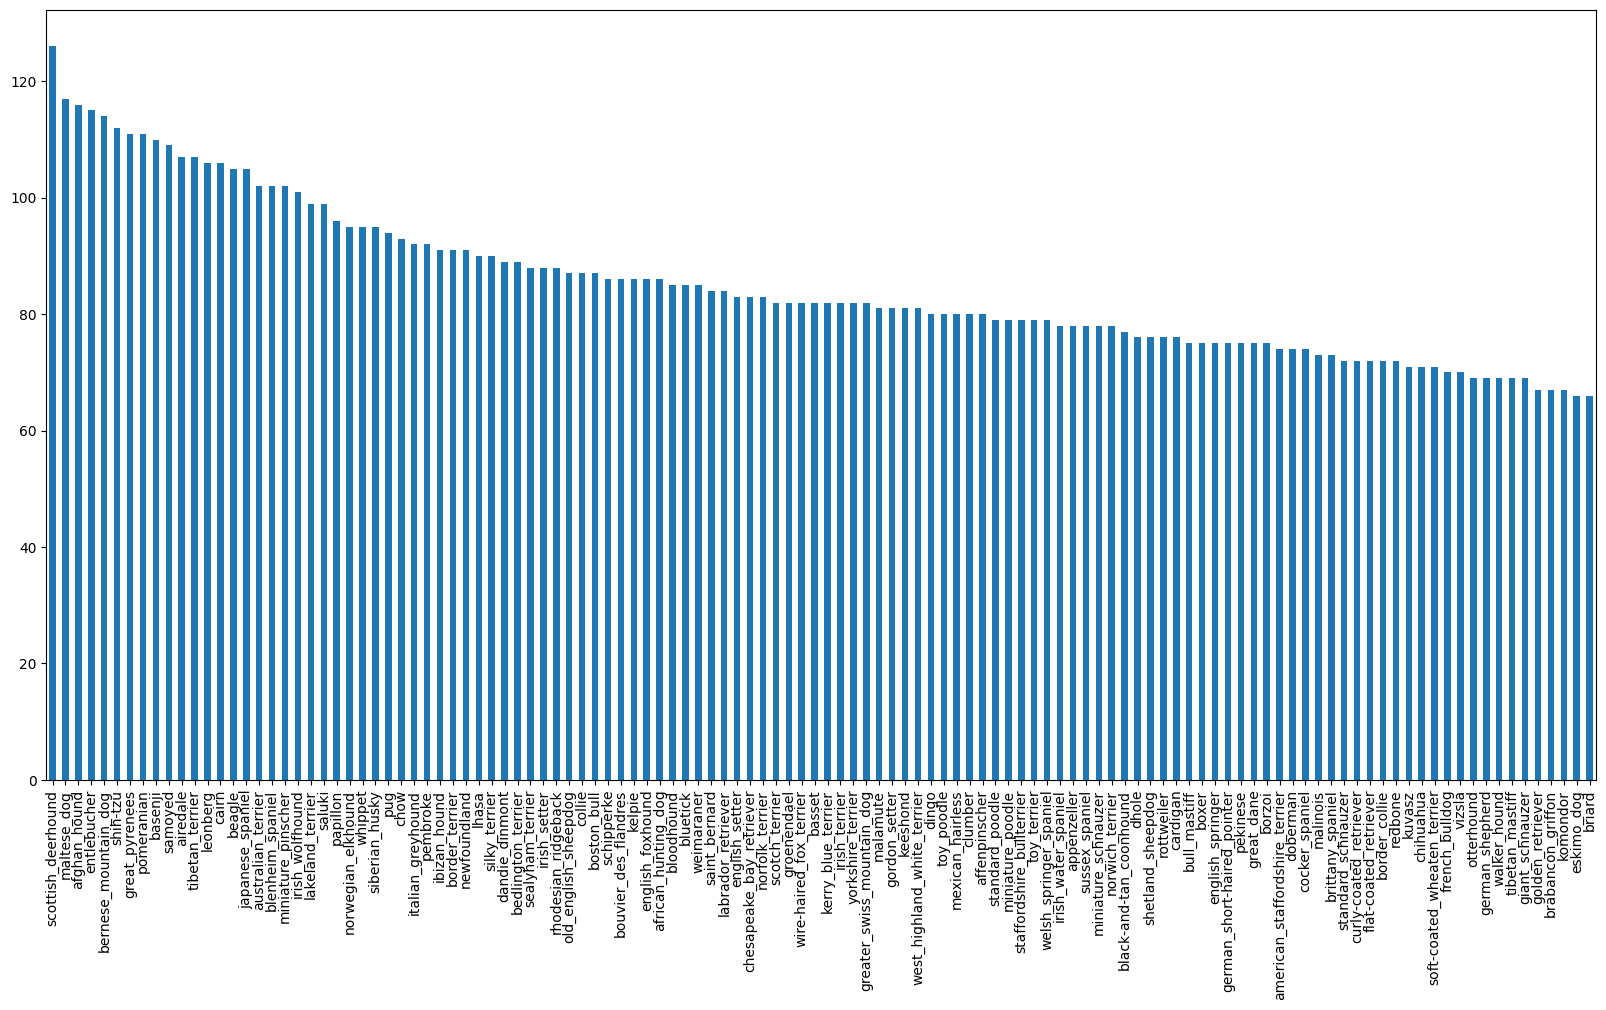

In [103]:
# How many images are there for each class?
labels_csv['breed'].value_counts().plot.bar(figsize=(20, 10))

In [104]:
labels_csv['breed'].value_counts().median()

82.0

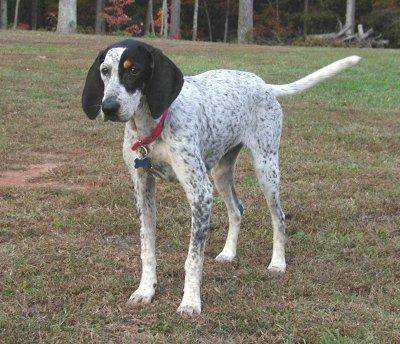

In [105]:
# View an Image
from IPython.display import Image
Image("drive/MyDrive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg")

### Getting images and their labels

Let's get a list of all of our image file path names.

In [106]:
# Create pathnames from image ID's
filenames = ["drive/MyDrive/Dog Vision/train/" + fname + ".jpg" for fname in labels_csv['id']]

# Check the first 10
filenames[:10]

['drive/MyDrive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [107]:
# Check whether number of filenames matches number of actual image files
import os
if len(os.listdir("drive/MyDrive/Dog Vision/train/")) == len(filenames):
  print("Filename count matched!")
else:
  print("Filename count not matched!")

Filename count matched!


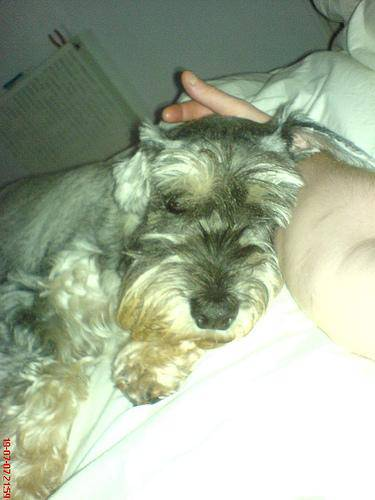

In [108]:
# Check the 9000th image
Image(filenames[26])

In [109]:
labels_csv['breed'][9000]

'tibetan_mastiff'

Since we've now got our training image filepaths in a list, let's prepare our labels.

In [110]:
import numpy as np
labels = labels_csv["breed"].to_numpy()
# labels = np.array(labels) # Does same thing as above
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [111]:
len(labels)

10222

In [112]:
# See if number of labels matches the number of filenames
if len(labels) == len(filenames):
  print("Number of labels matches number of filenames")
else:
  print("Number of labels does not match number of filenames")

Number of labels matches number of filenames


In [113]:
# Find the unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [114]:
# Turn a single label into an array of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [115]:
# Turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [116]:
len(boolean_labels)

10222

In [117]:
# Example: turning boolean array into integers
print(labels[0]) # original label
print(np.where(unique_breeds == labels[0])) # index where label occures
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occures

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [118]:
filenames[:10]

['drive/MyDrive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

### Creating our own validation set

Since the dataset from kaggle doesn't come with a validation set, we're going to create our own

In [119]:
# Setup X & y
X = filenames
y = boolean_labels

We are going to start off exeprtimenting with ~1000 images and increase as needed

In [120]:
# Set the number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:'slider', min:1000, max:10000, step:1000}

In [121]:
# Let's split the data into train and validation
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES], y[:NUM_IMAGES], test_size=0.2, random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [122]:
# Let's have geez at the training data
X_train[:2], y_train[:2]

(['drive/MyDrive/Dog Vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/MyDrive/Dog Vision/train/0d2f9e12a2611d911d91a339074c8154.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, Fal

## Preprocessing Images (Turning images into Tensors)

to preprocess the images into tensors we can write a function which does a few things

1. Take a image filepath as an input
2. Use TensorFlow to read the file and save it to a variable, `image`
3. Turn our `image` (a jpg) into tensors
4. Normalize images (convert color channel values from 0-255 to 0-1)
5. Resize the `image` to be a shape of(224, 224)
6. Return the modified `image`

[TensorFlow Data Loading](https://www.tensorflow.org/guide/data)

Let's see what importing an image looks like

In [123]:
# Convert image into a numpy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [124]:
image.max(), image.min()

(255, 0)

In [125]:
image[0:2]

array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)

In [126]:
# turn image into a tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)>

In [127]:
# Define image size
IMG_SIZE = 224

# Create a function for preprocessig images
def process_image(image_path, img_size=IMG_SIZE):
  """
  Takes an image file path and turns the image into Tensor.
  """

  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turns the image into numeric Tensor with 3 color channels
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the color channel values from 0-255 to 0-1
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired value (224, 224)
  image = tf.image.resize(image, size=[img_size, img_size])

  return image

## Turning the Data into batches

Why turn our data into batches?

Let's say you are trying to process 10,000+ images in one go... they all might not fit into memory

So that's why we do about 32 (batch size) images at a time (can manually adjust this) 32 is a recommended size.

In order to use TensorFlow effectively, we need our data in the form of Tensor tuples which look like this: `(image, label)`.

In [128]:
# Create a function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label,
  processes the image and returns a tuple of image(image, label)
  """
  image = process_image(image_path)
  return image, label

In [129]:
# Demo of the above function
(process_image(X[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

In [130]:
#Define the batch size
BATCH_SIZE = 32

num = 0
# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches..")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Create validation data batches..")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    # Turn filepath and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))

    # Create (image, label) tuples (this also turns the image path into preprosessed image)
    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)

  return data_batch

In [131]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Create validation data batches..


In [132]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing Data Batches

Our data is now in batches, however, these can be little hard to understand/comprehend, let's visualize them!

In [133]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a databatch.
  """

  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaing 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Displays an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis("off")

In [134]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

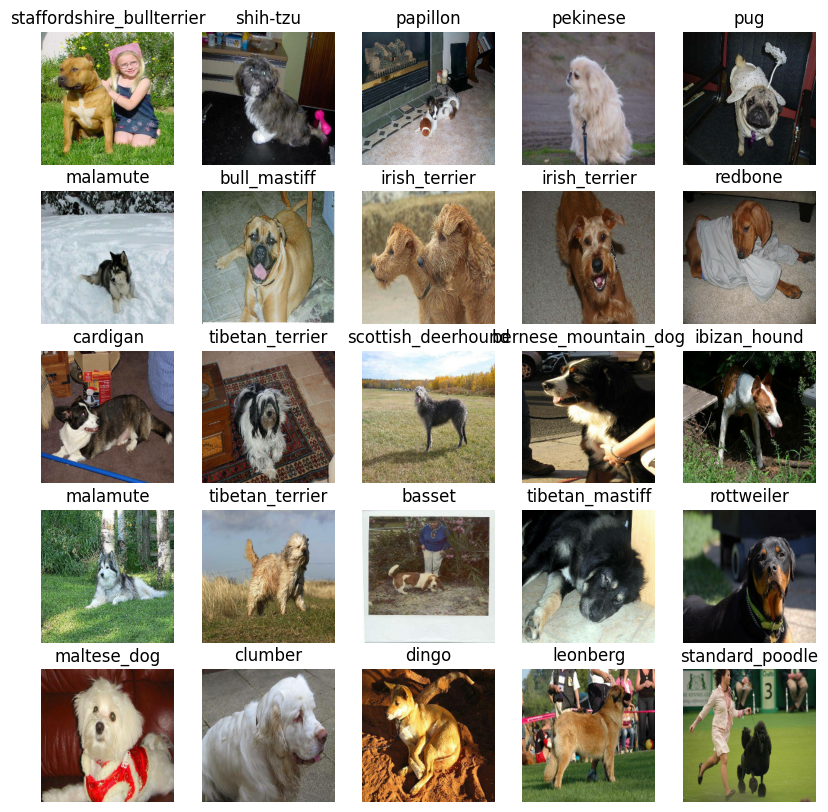

In [135]:
# Now let's visualize the data in a training batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

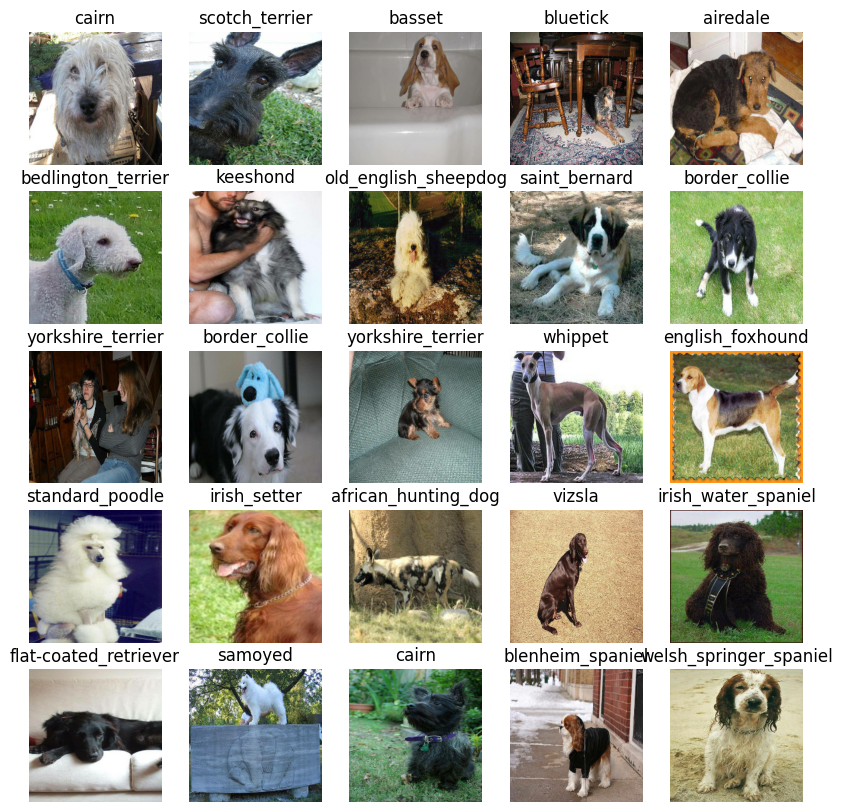

In [136]:
# Now let's visualize our validation set
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

In [137]:
unique_breeds[y[0].argmax()]

'boston_bull'

In [138]:
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

## Building a Model

Before we build a model, there are few things we need to define
* The input shape (our images shape in the form of Tensors) of our model.
* The output shape (image labels in the form of tensors) of our model
* The URL of the model we want to use from tensorflo hub

In [139]:
# Setup input shape
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, color channels

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL
MODEL_URL = "https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/130-224-classification/versions/2"

Keras is the high-level API of the TensorFlow platform. It provides an approachable, highly-productive interface for solving machine learning (ML) problems, with a focus on modern deep learning. Keras covers every step of the machine learning workflow, from data processing to hyperparameter tuning to deployment. It was developed with a focus on enabling fast experimentation.

https://www.tensorflow.org/guide/keras

Now we've got our inputs, outputs and model ready to go. Let's put them together into a Keras deep learning model!

Knowing this, let's create a function which:
* Thakes the input shape, output shape and the model we've chosen as parameters
* Define a layers in a Keras model in sequential fashion (do this first, then this, then that)
* Compliles the model (says it should be evaluated and improved)
* Build the model (tells the model the input shape it'll be getting)
* Returns the model

All of these steps can be found here - https://www.tensorflow.org/guide/keras

In [140]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with: ", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
      hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
      tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                            activation="softmax") # Layer 2 (Output Layer)
  ])

  # Compile the model
  model.compile(
      loss = tf.keras.losses.CategoricalCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  # Build the model
  model.build(INPUT_SHAPE)

  return model

In [141]:
model = create_model()
model.summary()

Building model with:  https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/130-224-classification/versions/2
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1001)              5432713   
                                                                 
 dense_2 (Dense)             (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


## Creating Callbacks

Callbacks are helper functions a model can use during training to do such things as save its progress, check its progress or stop training early if a model stops improving.

We'll create two callbacks, one for TensorBoard which helps track our models progress and another for early stopping which prevent our model from training for too long.

## TensorBoard Callback

To setup a TensorBoard callbacks, we need to do 3 things:
1. Load the TensorBoard notebook extension
2. Create a TensorBoard callbacks which is able to save logs to a directory and pass it to our model's `fit()` function.
3. Visualize our models training logs with the `%tensorboard` magic function (we'll do this after model training).

In [142]:
# Load TensorBoard notebook extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [143]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("drive/My Drive/Dog Vision/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

## Early Stopping Callbacks

Early stopping helps stop our model from overfitting by stopping training if a certain evaluation metric stops improving.

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

In [144]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=3)

## Trining a model (on subset of data)

Our first model is only going to train on 1000 images to make sure everything is working.

In [145]:
NUM_EPOCHS = 100 #@param {"type": "slider", "min": 10, "max": 100, "step": 10}

In [146]:
# Check to make sure we're still running on a GPU
print("GPU", "available (Yes!)" if tf.config.list_physical_devices("GPU") else "not available!")

GPU available (Yes!)


Lets create a function which trains a model
* Create a model using `create_model()`
* setup a tensorboard callback using `create_tensorboard_callback()`
* call the `fit()` function on our model passing it the training data, validation data, number of epochs to train for (`NUM_EPOCHS`) and the callbacks we'd like to use
* Return the model

In [147]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version
  """

  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we create
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])

  # Return the fitted model
  return model

In [158]:
# Fit the model to the data
model = train_model()

Building model with:  https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/130-224-classification/versions/2
Epoch 1/100
25/25 [==============================] - 10s 195ms/step - loss: 4.5285 - accuracy: 0.1000 - val_loss: 3.3965 - val_accuracy: 0.2600
Epoch 2/100
25/25 [==============================] - 6s 233ms/step - loss: 1.5782 - accuracy: 0.6862 - val_loss: 2.1660 - val_accuracy: 0.5050
Epoch 3/100
25/25 [==============================] - 4s 179ms/step - loss: 0.5442 - accuracy: 0.9513 - val_loss: 1.6570 - val_accuracy: 0.5950
Epoch 4/100
25/25 [==============================] - 4s 173ms/step - loss: 0.2461 - accuracy: 0.9837 - val_loss: 1.5065 - val_accuracy: 0.5950
Epoch 5/100
25/25 [==============================] - 6s 241ms/step - loss: 0.1429 - accuracy: 0.9950 - val_loss: 1.4318 - val_accuracy: 0.6350
Epoch 6/100
25/25 [==============================] - 4s 157ms/step - loss: 0.0983 - accuracy: 1.0000 - val_loss: 1.3795 - val_accuracy: 0.6400
E

It looks like our model is overfitting because it's performing far better on the training data set than validation dataset, what are some ways to prevent model overfiting in deep learning neural networks?

Overfitting to begin with is a good thing! It means our model is learning!

### Checking the Tensorboad logs

The TensorBoard magic function (`%tensorboard`) will access the logs directory we created earlier and visualize its content.

In [ ]:
%tensorboard --logdir drive/My\ Drive/Dog\ Vision/logs

## Making and evaluating predictions using a trained model

In [159]:
# Make predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 2s 123ms/step


array([[3.95236886e-04, 4.20057331e-05, 6.87744527e-04, ...,
        1.04629209e-04, 2.65852414e-05, 3.31921666e-03],
       [1.40421349e-03, 5.68124000e-04, 1.21573056e-03, ...,
        1.48661071e-04, 2.17322330e-03, 7.84123949e-06],
       [6.42404339e-05, 1.89793336e-05, 2.85827155e-05, ...,
        1.71302090e-04, 2.19058911e-05, 2.57518113e-04],
       ...,
       [7.10220093e-06, 6.75247575e-05, 4.10781695e-06, ...,
        8.03709554e-06, 1.71163119e-05, 8.76110335e-06],
       [5.56786265e-03, 1.48656065e-04, 1.67611302e-04, ...,
        5.95782476e-04, 1.09253924e-04, 4.68960144e-02],
       [3.36915364e-05, 1.30598719e-05, 2.60602660e-03, ...,
        5.70689421e-03, 1.95490400e-04, 4.12900918e-05]], dtype=float32)

In [160]:
predictions.shape

(200, 120)

In [161]:
len(y_val), len(unique_breeds)

(200, 120)

In [162]:
predictions[0]

array([3.95236886e-04, 4.20057331e-05, 6.87744527e-04, 9.37205332e-05,
       1.79751238e-04, 4.74980188e-05, 6.02019485e-03, 3.20429623e-04,
       5.35483960e-05, 5.66548493e-04, 2.43483300e-04, 6.66793057e-05,
       1.59108231e-03, 9.63897310e-06, 1.83997428e-04, 2.59665219e-04,
       8.04035226e-05, 3.30215633e-01, 3.41009991e-06, 1.81039541e-05,
       4.20867320e-04, 2.77609186e-04, 4.70168470e-06, 4.34806629e-04,
       2.14628617e-05, 7.86682649e-05, 3.21003407e-01, 3.60423670e-04,
       7.26502098e-04, 8.19042325e-05, 1.11441928e-04, 2.33474257e-03,
       3.87789565e-04, 1.77515903e-05, 2.63920054e-04, 2.24867668e-02,
       2.87723506e-05, 9.27523215e-05, 1.28477608e-04, 1.94839104e-05,
       4.79114999e-04, 5.29476565e-05, 3.67459688e-05, 1.79350463e-04,
       5.59341925e-06, 3.97523690e-04, 2.14575903e-06, 2.32298829e-04,
       6.90363930e-04, 4.87459984e-05, 2.87138711e-04, 1.14375121e-04,
       4.87300596e-04, 8.07241449e-05, 9.52190312e-05, 2.99358071e-05,
      

In [163]:
len(predictions[0])

120

In [164]:
np.sum(predictions[0]), np.sum(predictions[1]), np.sum(predictions[2])

(1.0, 0.9999999, 1.0)

In [165]:
# First Predictions
index = 3
print(predictions[index])
print(f"Max value (probability of prediction): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")

[3.26704304e-03 1.20051776e-03 7.46111400e-05 1.26982313e-02
 3.86212087e-05 7.57887319e-04 5.19291498e-04 6.33075018e-04
 1.74843124e-03 1.14684217e-02 1.69347986e-04 8.26150551e-03
 4.07095038e-04 2.41860817e-03 8.92332318e-05 6.63018882e-01
 1.50401684e-05 1.13279652e-02 2.00354625e-05 2.28568770e-05
 1.25382372e-04 7.47009253e-05 5.82119937e-05 6.19835691e-06
 7.58608337e-04 1.58299445e-05 7.39818861e-05 9.42321843e-04
 7.00387347e-04 5.20748035e-05 2.74895706e-06 5.02931245e-04
 1.07628223e-03 2.00969480e-05 9.44718849e-05 3.87206185e-03
 1.24433893e-03 2.23277952e-04 5.42553025e-04 2.65070732e-04
 1.64221169e-03 3.74139745e-05 1.61958335e-03 3.66971108e-05
 1.83846030e-04 4.27503892e-07 1.71255015e-04 5.83135663e-03
 2.05366214e-05 2.14922591e-04 1.66999234e-03 2.23246334e-05
 2.89234828e-04 1.13659135e-05 2.83266058e-06 1.08269996e-04
 2.20472401e-04 1.13797067e-02 2.61888863e-06 1.17161106e-02
 5.34211040e-06 4.28025058e-04 3.29577524e-05 6.82474410e-06
 7.48346138e-05 1.956148

Having the above functionality is great but we want to be able to do it at scale.

And it would be even better if we could see the image the prediction is being made on!

**Note:** Prediction probabilities are also known as confidence levels

In [166]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction prababilities into a label.
  """

  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[81])
pred_label

'dingo'

Now since our validation data is still in a batch dataset, we'll have to unbatchify it to make predictions on the validation images and then compare those predictions to the validation labels (truth labels).

In [167]:
# Create a function to unbatch a batch dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and returns separated arrays of images and labels.
  """

  images = []
  labels = []

  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])

  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [168]:
get_pred_label(val_labels[0])

'affenpinscher'

Noe we've got ways to get:
* predictions labels
* Validation labels (truth labels)
* validation images

Let's make some function to make these all a bit more visualize
We'll create a function which:
* Takes an array of prediction probabilities, an array of truth labels and array of images and integers
* Convert the prediction probabilities to a predicted label
* Plot the predicted label, its predicted probability, the truth label and the target images on a single plot

In [169]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  Vies the prediction, ground truth and image for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image and remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Change plot title to be predicted, probability of prediction and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label,
                              np.max(pred_prob)*100,
                              true_label),
            color=color)

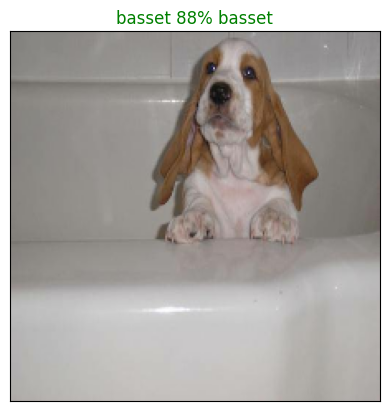

In [170]:
plot_pred(prediction_probabilities = predictions,
          labels = val_labels,
          images = val_images,
          n=2)

Now we've got one function to visualize our models top prediction, let's make another to view our models top 10 predictions.
This function will:
* Take an input of prediction probabilities array and a ground truth array and an integer
* Find the prediction using `get_pred_label()`
* Find the top 10:
  * Prediction probabilities indexes
  * Prediction probabilities values
  * Prediction labels
* Plot the top 10 prediction probability values and labels, coloring the true label green

In [171]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plot the top 10 highest prediction confidences along with the truth table for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]

  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]

  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

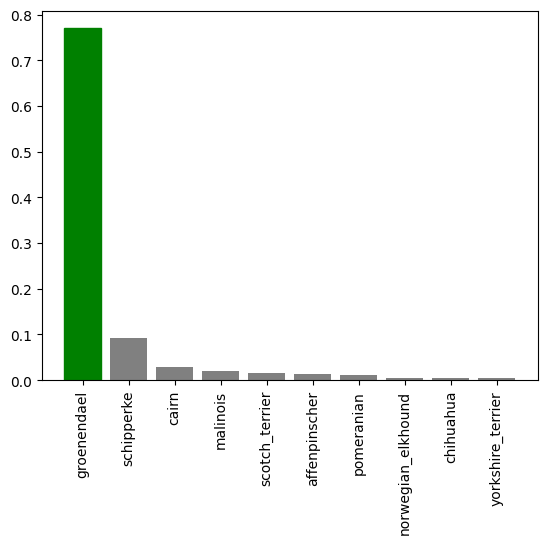

In [172]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=77)

Now we've got some functions to help us visualize our predictions and evaluate our model, let's check out a few

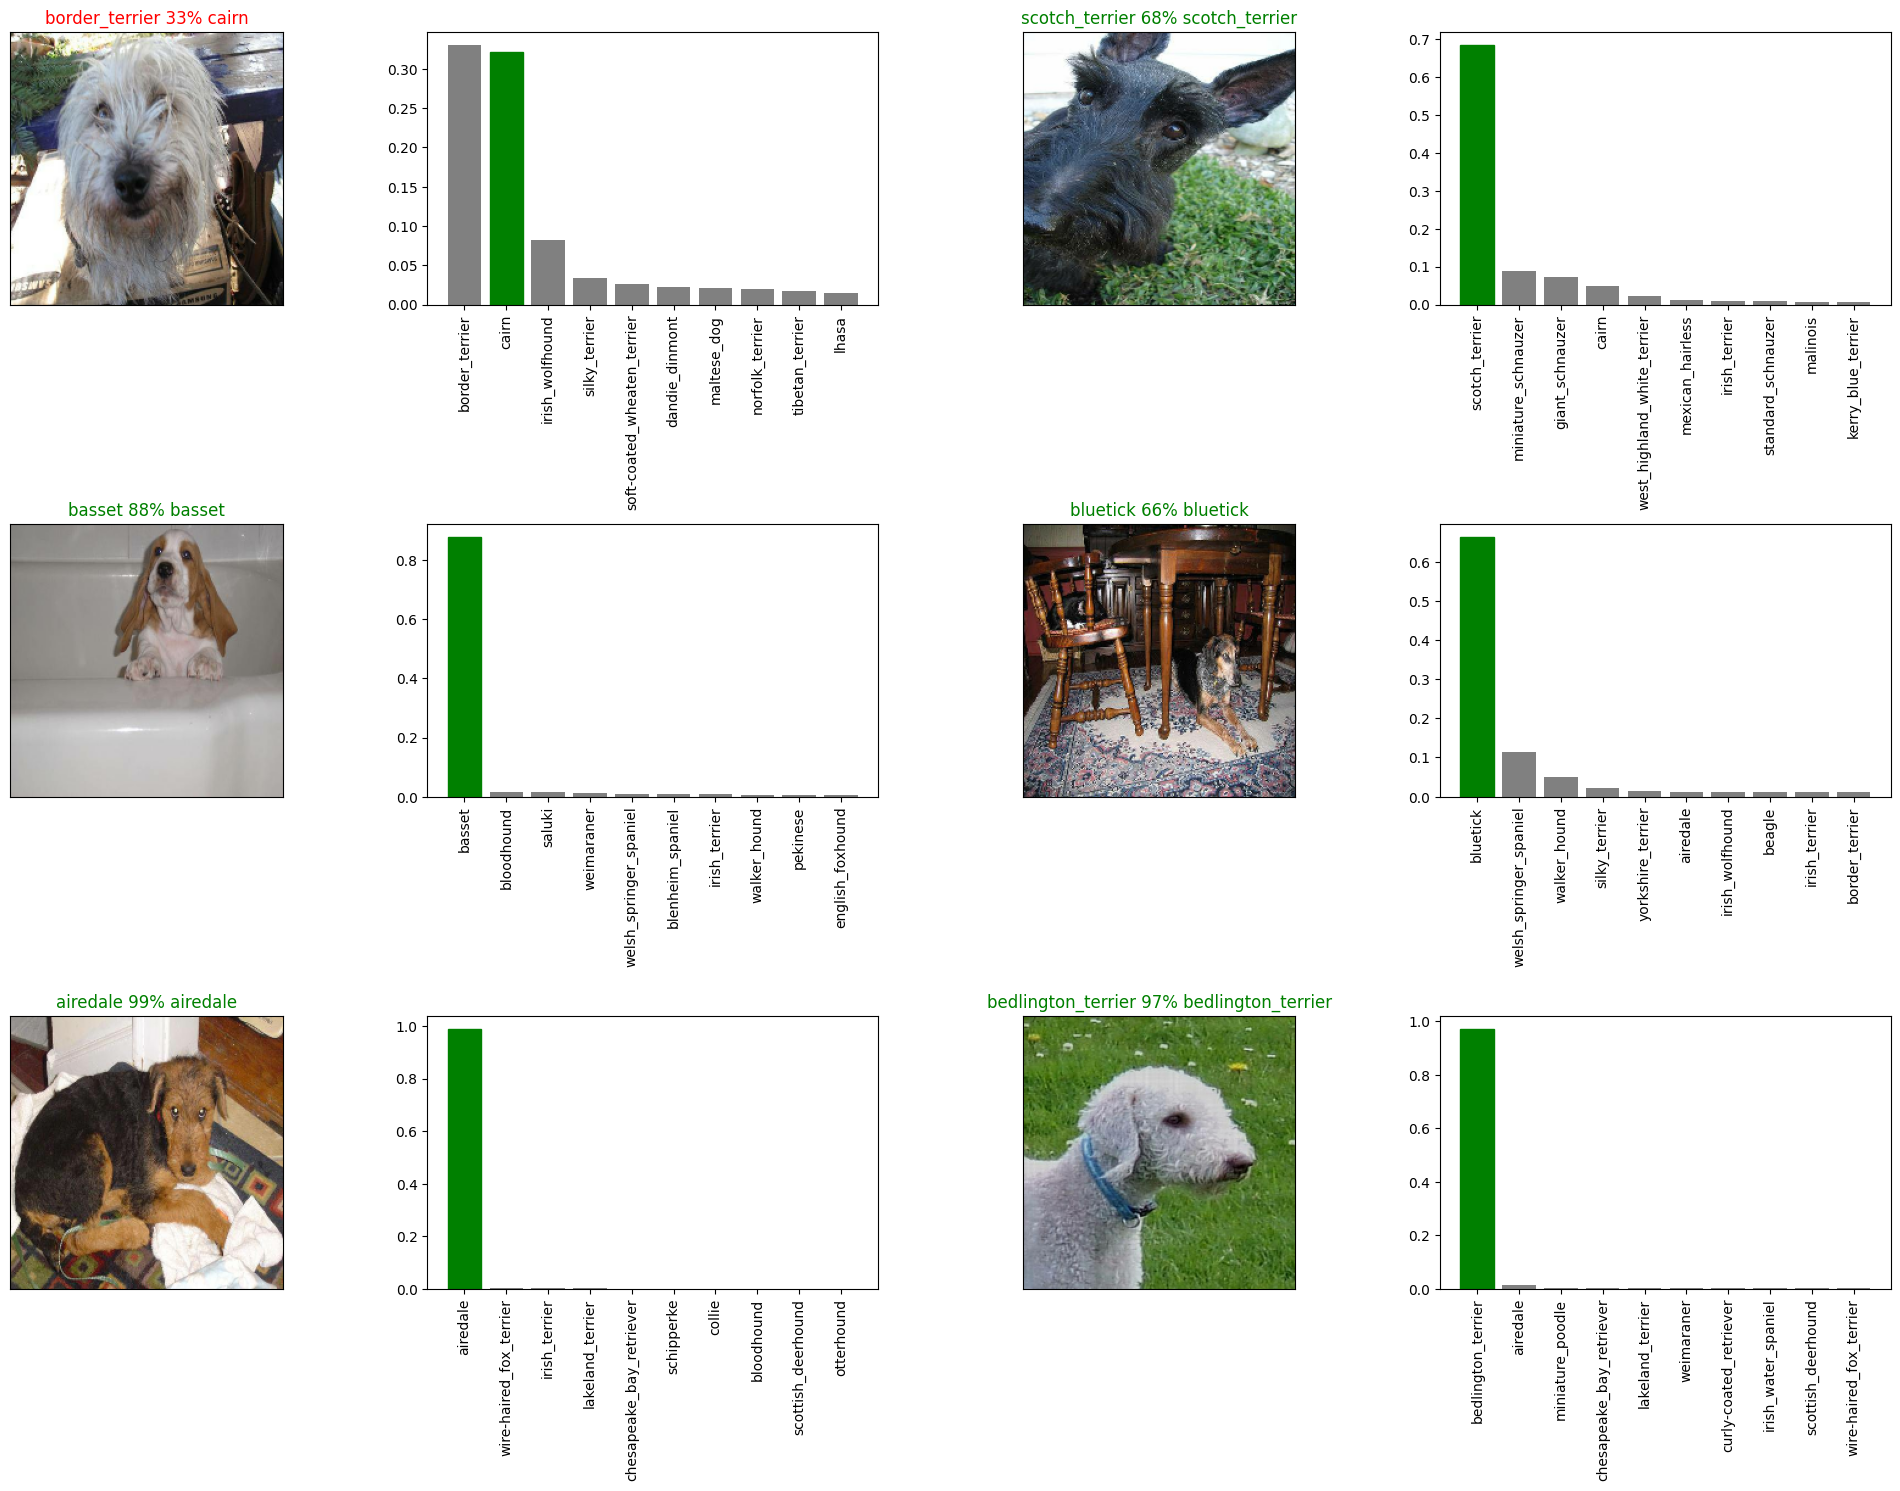

In [173]:
# Let's check out a few predictions and their different values
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols

plt.figure(figsize=(10*num_cols, 5*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multiplier)

plt.tight_layout(h_pad=1.0)
plt.show()

## Saving and reloading a trained model

In [174]:
# Create a function to save a model
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (string).
  """
  # Create a model directory pathname with current time
  modeldir = os.path.join("drive/My Drive/Dog Vision/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to : {model_path}...")
  model.save(model_path)
  return model_path

In [152]:
# Create a function to load a trained model
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer": hub.KerasLayer})

  return model

## Save our model trained on 1000 images

In [ ]:
# Save our model trained on 1000 images
save_model(model, suffix="1000-images-mobilenetv2-Adam")

In [58]:
# Load a trained model
loaded_1000_image_model = load_model("drive/My Drive/Dog Vision/models/20240122-11571705924631-1000-images-mobilenetv2-Adam.h5")

Loading saved model from: drive/My Drive/Dog Vision/models/20240122-11571705924631-1000-images-mobilenetv2-Adam.h5


In [59]:
# Evaluate the pre-saved model
model.evaluate(val_data)

7/7 [==============================] - 19s 2s/step - loss: 5.7316 - accuracy: 0.0050


[5.731618881225586, 0.004999999888241291]

In [60]:
# Evaluate the loaded model
loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 2s 103ms/step - loss: 1.2200 - accuracy: 0.6700


[1.2199501991271973, 0.6700000166893005]

## Training a big model with full data set

In [61]:
# Create a data batch with the full data set
full_data = create_data_batches(X, y)

Creating training data batches...


In [62]:
full_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [63]:
len(full_data)

320

In [64]:
# Create a model for full data
full_model = create_model()

Building model with:  https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/130-224-classification/versions/2


In [65]:
# Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()
# No validation set when training on all the data, so we can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

**NOTE:** Running the cell below will take a little white (maybe up to 30 minutes for the first epoch) because the GPU we're using in the runtime has to load all of the images into memory.

In [66]:
# Fit the full model to the full data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 978s 3s/step - loss: 1.3437 - accuracy: 0.6659
Epoch 2/100
320/320 [==============================] - 44s 139ms/step - loss: 0.4093 - accuracy: 0.8791
Epoch 3/100
320/320 [==============================] - 45s 140ms/step - loss: 0.2378 - accuracy: 0.9351
Epoch 4/100
320/320 [==============================] - 46s 143ms/step - loss: 0.1546 - accuracy: 0.9642
Epoch 5/100
320/320 [==============================] - 45s 139ms/step - loss: 0.1087 - accuracy: 0.9766
Epoch 6/100
320/320 [==============================] - 47s 148ms/step - loss: 0.0766 - accuracy: 0.9869
Epoch 7/100
320/320 [==============================] - 45s 142ms/step - loss: 0.0604 - accuracy: 0.9901
Epoch 8/100
320/320 [==============================] - 43s 133ms/step - loss: 0.0459 - accuracy: 0.9948
Epoch 9/100
320/320 [==============================] - 44s 138ms/step - loss: 0.0384 - accuracy: 0.9950
Epoch 10/100
320/320 [==============================] - 44s 138ms/

In [69]:
save_model(full_model, suffix="full-image-set-mobilenetv2-Adam")

Saving model to : drive/My Drive/Dog Vision/models/20240123-17191706030345-full-image-set-mobilenetv2-Adam.h5...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'drive/My Drive/Dog Vision/models/20240123-17191706030345-full-image-set-mobilenetv2-Adam.h5'

In [153]:
# Load in the full model
loaded_full_model = load_model('drive/My Drive/Dog Vision/models/20240123-17191706030345-full-image-set-mobilenetv2-Adam.h5')

Loading saved model from: drive/My Drive/Dog Vision/models/20240123-17191706030345-full-image-set-mobilenetv2-Adam.h5


## Making Predictions on the test dataset

Since our model has been trained on images in the form of Tensor batches, to make predictions on the test data, we'll have to get it into the same format.

Luckily we created `create_data_batches()` earlier which can take a list of filenames as input and convert them into Tensor batches.

To make predictions on the test data, we'll:
* Get the test image filenames.
* Convert the filenames into test data batches using `create_data_batches()` and setting the `test_data` parameter to `True` (since the test data doesn't have labels).
* Make a predictions array by passing the test batches to the `predict()` method called on our model.

In [71]:
# Load test image filenames
test_path = "drive/MyDrive/Dog Vision/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['drive/MyDrive/Dog Vision/test/de9a61a532241cff14e732f43b646d9a.jpg',
 'drive/MyDrive/Dog Vision/test/e5f2204119380ce1a17fd09435c5012a.jpg',
 'drive/MyDrive/Dog Vision/test/e64b15ca154304104fe95ded7338858e.jpg',
 'drive/MyDrive/Dog Vision/test/e2976affb6d88a3e627ff8c31844f20a.jpg',
 'drive/MyDrive/Dog Vision/test/ddf0164ab3a269b179051bdecaea34b0.jpg',
 'drive/MyDrive/Dog Vision/test/e246de79e4efd1145698d9c21466bbaf.jpg',
 'drive/MyDrive/Dog Vision/test/e18c30f7ba3680d75ff326ccb71642e0.jpg',
 'drive/MyDrive/Dog Vision/test/e1a777d181483b0982732fa4128df7f8.jpg',
 'drive/MyDrive/Dog Vision/test/e219af838e1d6a18224eb9b478944778.jpg',
 'drive/MyDrive/Dog Vision/test/e4235f4b313a4b49946938992dd95249.jpg']

In [72]:
len(test_filenames)

10357

In [73]:
# Create test data batches
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches..


In [74]:
test_data

<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

**Note:** Calling `predict()` on our full model and passing it the test data batch will take a ling time to run (about an ~1 hr).

In [75]:
# Make predictions on test data batch using the loaded full model
test_predictions = loaded_full_model.predict(test_data,
                                             verbose=1)

324/324 [==============================] - 1110s 3s/step


In [80]:
# Save predictions (Numpy array) to csv file (for access later)
np.savetxt("drive/My Drive/Dog Vision/preds_array.csv", test_predictions, delimiter=",")

In [91]:
# Load predictions (Numpy array) from csv file
test_predictions = np.loadtxt("drive/My Drive/Dog Vision/preds_array.csv", delimiter=",")

In [92]:
test_predictions[:10]

array([[1.08751337e-04, 5.14302010e-05, 4.65102602e-07, ...,
        1.74396021e-07, 2.79494384e-06, 7.22923374e-08],
       [1.16605636e-09, 2.13437410e-08, 2.67761664e-11, ...,
        4.15022470e-07, 2.30517228e-09, 6.00721643e-12],
       [6.80231205e-09, 6.72245200e-15, 5.44512213e-10, ...,
        1.82071858e-07, 1.92084144e-08, 1.87804503e-07],
       ...,
       [2.83170598e-10, 7.65927946e-11, 3.47810070e-09, ...,
        2.60498689e-09, 2.59121322e-07, 2.45154911e-06],
       [5.57533360e-12, 1.86759213e-08, 1.52887097e-07, ...,
        2.90205153e-05, 1.18993704e-10, 1.00280817e-09],
       [2.96356162e-10, 1.13781111e-11, 6.20075483e-14, ...,
        5.70595979e-13, 4.47361392e-09, 1.14667786e-08]])

In [93]:
test_predictions.shape

(10357, 120)

## Preparing test dataset predictions for Kaggle

Looking at the Kaggle sample submission, we find that it wants our models prediction prabability outputs in a DataFrame with an ID and a column for each different dog breed.
https://www.kaggle.com/competitions/dog-breed-identification

To get the data in this format, we'll:
* Create a pandas DataFrame with an ID column as well as a column for each dog breed
* Add data to the ID column by extracting the test image ID's from their file paths
* Add data (the prediction probabilities) to each of the dog breed columns.
* Export the DataFrame as a CSV to submit it to Kaggle.

In [94]:
# Create a pandas DataFrame with empty columns
preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))
preds_df.head()

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [95]:
# Append test image ID's to predictions DataFrame
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df["id"] = test_ids

In [96]:
preds_df.head()

id affenpinscher afghan_hound  \
0  de9a61a532241cff14e732f43b646d9a           NaN          NaN   
1  e5f2204119380ce1a17fd09435c5012a           NaN          NaN   
2  e64b15ca154304104fe95ded7338858e           NaN          NaN   
3  e2976affb6d88a3e627ff8c31844f20a           NaN          NaN   
4  ddf0164ab3a269b179051bdecaea34b0           NaN          NaN   

  african_hunting_dog airedale american_staffordshire_terrier appenzeller  \
0                 NaN      NaN                            NaN         NaN   
1                 NaN      NaN                            NaN         NaN   
2                 NaN      NaN                            NaN         NaN   
3                 NaN      NaN                            NaN         NaN   
4                 NaN      NaN                            NaN         NaN   

  australian_terrier basenji basset  ... toy_poodle toy_terrier vizsla  \
0                NaN     NaN    NaN  ...        NaN         NaN    NaN   
1                NaN     NaN    NaN  ...        NaN         NaN    NaN   
2                NaN     NaN    NaN  ...        NaN         NaN    NaN   
3                NaN     NaN    NaN  ...        NaN         NaN    NaN   
4                NaN     NaN    NaN  ...        NaN         NaN    NaN   

  walker_hound weimaraner welsh_springer_spaniel west_highland_white_terrier  \
0          NaN        NaN                    NaN                         NaN   
1          NaN        NaN                    NaN                         NaN   
2          NaN        NaN                    NaN                         NaN   
3          NaN        NaN                    NaN                         NaN   
4          NaN        NaN                    NaN                         NaN   

  whippet wire-haired_fox_terrier yorkshire_terrier  
0     NaN                     NaN               NaN  
1     NaN                     NaN               NaN  
2     NaN                     NaN               NaN  
3     NaN                     NaN               NaN  
4     NaN                     NaN               NaN  

[5 rows x 121 columns]

In [97]:
# Add the prediction probabilities to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

id  affenpinscher  afghan_hound  \
0  de9a61a532241cff14e732f43b646d9a   1.087513e-04  5.143020e-05   
1  e5f2204119380ce1a17fd09435c5012a   1.166056e-09  2.134374e-08   
2  e64b15ca154304104fe95ded7338858e   6.802312e-09  6.722452e-15   
3  e2976affb6d88a3e627ff8c31844f20a   1.859492e-09  3.143675e-09   
4  ddf0164ab3a269b179051bdecaea34b0   1.256033e-06  4.817089e-09   

   african_hunting_dog      airedale  american_staffordshire_terrier  \
0         4.651026e-07  3.180220e-05                    1.290956e-09   
1         2.677617e-11  7.064797e-12                    1.911619e-10   
2         5.445122e-10  3.581135e-13                    1.040377e-08   
3         4.088362e-10  1.229928e-09                    3.349772e-08   
4         1.482735e-06  9.732518e-12                    3.194727e-07   

    appenzeller  australian_terrier       basenji        basset  ...  \
0  6.115632e-10        3.589825e-05  2.386292e-07  2.150093e-09  ...   
1  9.975072e-01        2.017516e-11  2.578058e-06  1.359532e-09  ...   
2  3.471395e-08        1.898515e-10  8.083121e-06  1.292976e-11  ...   
3  1.723253e-08        3.744882e-08  1.308627e-10  3.834075e-09  ...   
4  1.099971e-11        7.403696e-02  5.783878e-07  8.636257e-09  ...   

     toy_poodle   toy_terrier        vizsla  walker_hound    weimaraner  \
0  2.896792e-07  8.965318e-07  8.436535e-07  1.287794e-06  4.315462e-09   
1  2.349541e-08  3.566399e-10  4.715827e-09  2.853990e-08  1.326957e-09   
2  4.507381e-08  9.569627e-01  1.069013e-08  1.976582e-09  9.510156e-10   
3  2.698350e-09  4.897342e-09  7.458858e-09  1.363833e-10  2.392664e-08   
4  2.009586e-06  2.740662e-05  3.662055e-10  2.936494e-10  5.759784e-09   

   welsh_springer_spaniel  west_highland_white_terrier       whippet  \
0            6.222120e-08                 2.006074e-08  1.743960e-07   
1            3.604720e-08                 1.427297e-11  4.150225e-07   
2            1.747177e-10                 2.817644e-06  1.820719e-07   
3            4.310070e-08                 5.566805e-08  9.285235e-08   
4            1.410460e-07                 4.103936e-04  3.241876e-10   

   wire-haired_fox_terrier  yorkshire_terrier  
0             2.794944e-06       7.229234e-08  
1             2.305172e-09       6.007216e-12  
2             1.920841e-08       1.878045e-07  
3             6.017042e-03       4.939134e-09  
4             4.044312e-06       3.605736e-01  

[5 rows x 121 columns]

In [98]:
# Save the predictions dataframe to CSV for submission to Kaggle
preds_df.to_csv("drive/My Drive/Dog Vision/dog_breed_recognition_model_mobilenetV2_v1.csv",
                index=False)

## Making predictions on custome images

To make predictions on custome images, we'll:
* Get the filepaths of our own images
* Turns the filepaths into data batches using `create_data_batches()`. And since our custom images won't have labels, we set the `test_data` parameter to `True`
* Pass the custom image data batch to our model's `predict()` method.
* Convert the prediction output prababilities to prediction labels.
* Compare the predicted labels to the custom images.

In [149]:
# Get custom image filepaths
custom_path = "drive/My Drive/Dog Vision/my-dog-images/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [150]:
custom_image_paths

['drive/My Drive/Dog Vision/my-dog-images/20200504_130632.jpg',
 'drive/My Drive/Dog Vision/my-dog-images/20200619_145810.jpg',
 'drive/My Drive/Dog Vision/my-dog-images/20200619_145722.jpg',
 'drive/My Drive/Dog Vision/my-dog-images/20200504_130629.jpg',
 'drive/My Drive/Dog Vision/my-dog-images/20191014_134136.jpg',
 'drive/My Drive/Dog Vision/my-dog-images/20160815_093502.jpg',
 'drive/My Drive/Dog Vision/my-dog-images/20201211_112605.jpg',
 'drive/My Drive/Dog Vision/my-dog-images/20160815_093438.jpg',
 'drive/My Drive/Dog Vision/my-dog-images/20201211_112618.jpg']

In [151]:
# Turn custom images into batch datasets
custom_data = create_data_batches(custom_image_paths, test_data=True)
custom_data

Creating test data batches..


<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [154]:
# Make predictions on the custom data
custom_preds = loaded_full_model.predict(custom_data)

1/1 [==============================] - 6s 6s/step


In [155]:
custom_preds.shape

(9, 120)

In [175]:
# Get custom image prediction labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['doberman',
 'appenzeller',
 'bluetick',
 'german_shepherd',
 'doberman',
 'african_hunting_dog',
 'mexican_hairless',
 'labrador_retriever',
 'mexican_hairless']

In [176]:
# Get custom images (our unbatchify() function won't work since there aren't labels... maybe we could fix this lator)
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

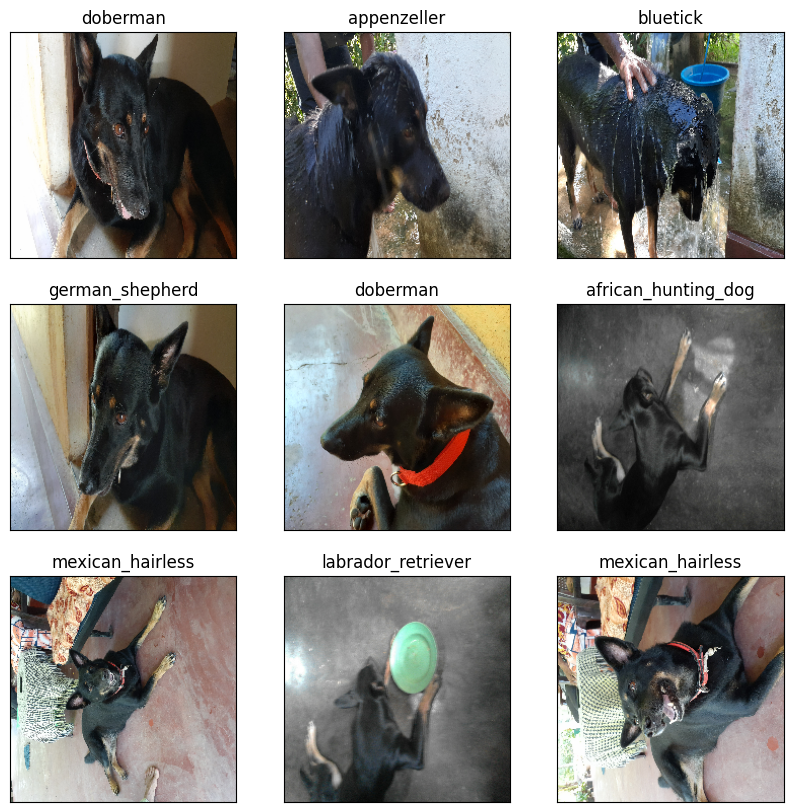

In [177]:
# Check custom image predictions
plt.figure(figsize=(10, 10))
for i, image in enumerate(custom_images):
  plt.subplot(3, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)